In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
from splinter import Browser
import pandas as pd
import itertools

In [2]:
roster_dataframe = pd.read_csv('season_long_roster') 
roster_dataframe

,Player_ID,Name,OnActv,IL,Age,Country_Code,B,T,Ht,Wt,...,SS,LF,CF,RF,OF,DH,PH,PR,NatsOrgFlag,Img_URL
0,0,Alberto Baldonado,1.0,NaN,28,PA,L,L,"6' 4""",250,...,0,0,0,0,0,0,0,0,1,https://www.baseball-reference.com/req/2021080...
1,1,Kyle Finnegan,1.0,NaN,29,US,R,R,"6' 2""",200,...,0,0,0,0,0,0,0,0,1,https://www.baseball-reference.com/req/2021080...
2,2,Josiah Gray,1.0,NaN,23,US,R,R,"6' 1""",190,...,0,0,0,0,0,0,0,0,1,https://www.baseball-reference.com/req/2021080...
3,3,Josh Rogers,1.0,NaN,26,US,L,L,"6' 3""",210,...,0,0,0,0,0,0,0,0,1,https://www.baseball-reference.com/req/2021080...
4,4,Mason Thompson,1.0,NaN,23,US,R,R,"6' 7""",223,...,0,0,0,0,0,0,0,0,1,https://www.baseball-reference.com/req/2021080...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,Jefry Rodriguez,0.0,NaN,27,DO,R,R,"6' 6""",232,...,0,0,0,0,0,0,0,0,1,https://www.baseball-reference.com/req/2021080...
60,60,Max Scherzer,0.0,NaN,36,US,R,R,"6' 3""",208,...,0,0,0,0,0,0,0,0,0,https://www.baseball-reference.com/req/2021080...
61,61,Kyle Schwarber,0.0,NaN,28,US,L,R,"6' 0""",229,...,0,72,0,0,72,0,0,0,0,https://www.baseball-reference.com/req/2021080...
62,62,Trea Turner,0.0,NaN,28,US,R,R,"6' 2""",185,...,96,0,0,0,0,0,0,0,0,https://www.baseball-reference.com/req/2021080...


In [3]:
#Define Executable Path for ChromeDriver to use for web scraping

executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Define base endpoint URL. Other url's will be built off this endpoint.

baseball_reference_main = 'https://www.baseball-reference.com'
test_hitter_player_endpoint = '/players/t/thomala02.shtml'
hitter_page = baseball_reference_main + test_hitter_player_endpoint
browser.visit(hitter_page)

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script src="https://cdn.krxd.net/userdata/get?pub=9427dd0d-835c-471c-a5db-ab01ae8a681c&amp;technographics=1&amp;callback=Krux.ns.investingchannelinc.kxjsonp_userdata" type="text/javascript"></script><script src="https://beacon.krxd.net/optout_check?callback=Krux.ns.investingchannelinc.kxjsonp_optOutCheck" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script><script src="https://consumer.krxd.net/consent/get/9427dd0d-835c-471c-a5db-ab01ae8a681c?idt=device&amp;dt=kxcookie&amp;callback=Krux.ns.investingchannelinc.kxjsonp_consent_get_0" type="text/javascript"></script><script defer="" src="https://tagan.adlightning.com/freestar/bl-
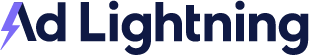

In [5]:
hitter_html = browser.html
hitter_soup = bs(hitter_html, 'html.parser')
hitter_soup

In [6]:
game_logs = hitter_soup.find('div', id="inner_nav").find(string=re.compile("Batting Game Logs")).find_parent('li')
game_logs

<li class="condensed hasmore" data-fade-selector="#inpage_nav"><span>More Thomas Pages</span>
<div>
<section>
<p><a href="/register/player.fcgi?id=thomas000lan">Minor &amp; Fall Lg Stats</a></p>
</section>
<p class="listhead">Batting Splits</p>
<ul class="">
<li><a href="/players/split.fcgi?id=thomala02&amp;year=Career&amp;t=b">Career</a></li>
<li><a href="/players/split.fcgi?id=thomala02&amp;year=2019&amp;t=b">2019</a></li>
<li><a href="/players/split.fcgi?id=thomala02&amp;year=2020&amp;t=b">2020</a></li>
<li><a href="/players/split.fcgi?id=thomala02&amp;year=2021&amp;t=b">2021</a></li>
</ul>
<p class="listhead">Batting Game Logs</p>
<ul class="">
<li><a href="/players/gl.fcgi?id=thomala02&amp;t=b&amp;year=2019">2019</a></li>
<li><a href="/players/gl.fcgi?id=thomala02&amp;t=b&amp;year=2020">2020</a></li>
<li><a href="/players/gl.fcgi?id=thomala02&amp;t=b&amp;year=2021">2021</a></li>
</ul>
<p class="listhead">Fielding Game Logs</p>
<ul class="">
<li><a href="/players/gl.fcgi?id=thomala

In [7]:
game_logs_batting_2021 = game_logs.find(href=re.compile("t=b&year=2021"))
batting_log_endpoint = game_logs_batting_2021['href']
batting_log_url = baseball_reference_main + batting_log_endpoint
browser.visit(batting_log_url)

In [32]:
pandas_table_scrape = pd.read_html(batting_log_url)
lane_thomas_df = pandas_table_scrape[-1]
lane_thomas_df['Name'] = 'Lane Thomas'
lane_thomas_df

,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,...,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos,Name
0,1,53,9 (8),Apr 11,STL,NaN,MIL,"L,3-9",CG,4,...,8,.69,-0.111,.82,-0.08%,-1.04,5.00,6.00,CF,Lane Thomas
1,2,54,10,Apr 12,STL,NaN,WSN,"L,2-5",9-GF,1,...,7,.36,0.011,.36,0.01%,0.21,3.00,3.00,PH,Lane Thomas
2,3,55,11,Apr 13,STL,NaN,WSN,"W,14-3",8-GF,1,...,9,.00,0.000,.00,0.00%,-0.15,0.00,0.00,PH CF,Lane Thomas
3,4,56,12,Apr 14,STL,NaN,WSN,"L,0-6",CG,4,...,7,.47,-0.047,.47,-0.03%,-0.76,0.00,0.00,CF,Lane Thomas
4,May,May,Gtm,Date,Tm,NaN,Opp,Rslt,Inngs,PA,...,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos,Lane Thomas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,61,113,146,Sep 15,WSN,NaN,MIA,"L,6-8",CG,6,...,1,1.91,0.309,.00,0.00%,1.67,16.00,22.20,CF,Lane Thomas
66,62,114,147,Sep 17,WSN,NaN,COL,"L,8-9",CG,6,...,1,2.42,0.069,.00,0.00%,2.23,25.00,34.90,CF,Lane Thomas
67,63,115,148,Sep 18,WSN,NaN,COL,"L,0-6",CG,4,...,1,.83,-0.098,.00,0.00%,-1.09,3.00,3.00,CF,Lane Thomas
68,64,116,149,Sep 19,WSN,NaN,COL,"W,3-0",CG,4,...,1,.61,-0.062,.00,0.00%,-0.92,0.00,0.00,CF,Lane Thomas


In [31]:
lane_thomas_df['H'] = lane_thomas_df['H'].astype(int)
lane_thomas_df['HR'] = lane_thomas_df['HR'].astype(int)
lane_thomas_df['2B'] = lane_thomas_df['2B'].astype(int)
lane_thomas_df['3B'] = lane_thomas_df['3B'].astype(int)

ValueError: invalid literal for int() with base 10: 'H'

In [28]:
bags_from_xbh = lane_thomas_df['HR'] * 4 + lane_thomas_df['2B'] * 2 + lane_thomas_df['3B'] * 3
lane_thomas_df['TB'] = bags_from_xbh + (lane_thomas_df['H'] - lane_thomas_df['HR'] - lane_thomas_df['3B'] - lane_thomas_df['2B'])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [33]:
non_wsn_games = lane_thomas_df.loc[(lane_thomas_df['Tm'] != 'WSN') & (lane_thomas_df['Tm'] != 'Tm') & (lane_thomas_df['Rk'].notnull())]
non_wsn_games


,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,...,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos,Name
0,1,53,9 (8),Apr 11,STL,NaN,MIL,"L,3-9",CG,4,...,8,.69,-0.111,.82,-0.08%,-1.04,5.00,6.00,CF,Lane Thomas
1,2,54,10,Apr 12,STL,NaN,WSN,"L,2-5",9-GF,1,...,7,.36,0.011,.36,0.01%,0.21,3.00,3.00,PH,Lane Thomas
2,3,55,11,Apr 13,STL,NaN,WSN,"W,14-3",8-GF,1,...,9,.00,0.000,.00,0.00%,-0.15,0.00,0.00,PH CF,Lane Thomas
3,4,56,12,Apr 14,STL,NaN,WSN,"L,0-6",CG,4,...,7,.47,-0.047,.47,-0.03%,-0.76,0.00,0.00,CF,Lane Thomas
5,5,57,34 (21),May 8,STL,NaN,COL,"W,9-8",8-GF,1,...,9,.78,0.049,.95,0.04%,0.87,2.00,3.00,LF,Lane Thomas
6,6,58,36 (1),May 11,STL,@,MIL,"W,6-1",8-8,0,...,9,NaN,NaN,NaN,NaN,NaN,0.00,0.00,PR,Lane Thomas
7,7,59,38 (1),May 13,STL,@,MIL,"W,2-0",9-9,1,...,9,1.02,0.099,1.64,0.10%,1.14,9.00,12.20,PH,Lane Thomas
8,8,60,40 (1),May 15,STL,@,SDP,"L,3-13",7-GF,1,...,7,.00,0.000,.00,0.00%,-0.22,0.00,0.00,2B,Lane Thomas
9,9,61,41,May 16,STL,@,SDP,"L,3-5",8-GF,1,...,8,2.82,-0.062,3.81,-0.05%,-0.35,0.00,0.00,LF,Lane Thomas
10,10,62,44 (2),May 21,STL,NaN,CHC,"L,3-12",9-GF,1,...,9,.01,0.000,.02,0.00%,-0.28,0.00,0.00,PH,Lane Thomas


In [34]:
non_wsn_games['H'] = non_wsn_games['H'].astype(int)
non_wsn_games['HR'] = non_wsn_games['HR'].astype(int)
non_wsn_games['2B'] = non_wsn_games['2B'].astype(int)
non_wsn_games['3B'] = non_wsn_games['3B'].astype(int)

/Users/tah96/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tah96/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tah96/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [35]:
non_wsn_games.dtypes

Rk            object
Gcar          object
Gtm           object
Date          object
Tm            object
Unnamed: 5    object
Opp           object
Rslt          object
Inngs         object
PA            object
AB            object
R             object
H              int64
2B             int64
3B             int64
HR             int64
RBI           object
BB            object
IBB           object
SO            object
HBP           object
SH            object
SF            object
ROE           object
GDP           object
SB            object
CS            object
BA            object
OBP           object
SLG           object
OPS           object
BOP           object
aLI           object
WPA           object
acLI          object
cWPA          object
RE24          object
DFS(DK)       object
DFS(FD)       object
Pos           object
Name          object
dtype: object

In [36]:
bags_from_xbh = non_wsn_games['HR'] * 4 + non_wsn_games['2B'] * 2 + non_wsn_games['3B'] * 3
non_wsn_games['TB'] = bags_from_xbh + (non_wsn_games['H'] - non_wsn_games['HR'] - non_wsn_games['3B'] - non_wsn_games['2B'])

/Users/tah96/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
schema_unmatched_df = non_wsn_games[['Rk','Name','Pos','AB','R','H','RBI','BB','SO','PA','2B','3B','HR','TB','HBP']]
schema_matched_df = schema_unmatched_df.rename({'Rk': 'GAME_ID', 'Name': 'Name', 'Pos':'Position',
                           'AB':'AB','R':'R','H':'H','RBI':'RBI','BB':'BB','SO':'K','PA':'PA'
                            ,'2B':'2B','3B':'3B','HR':'HR','TB':'TB','HBP':'HBP'}, axis=1)
schema_matched_df

,GAME_ID,Name,Position,AB,R,H,RBI,BB,K,PA,2B,3B,HR,TB,HBP
0,1,Lane Thomas,CF,3,0,1,0,1,1,4,0,0,0,1,0
1,2,Lane Thomas,PH,1,0,1,0,0,0,1,0,0,0,1,0
2,3,Lane Thomas,PH CF,1,0,0,0,0,1,1,0,0,0,0,0
3,4,Lane Thomas,CF,4,0,0,0,0,1,4,0,0,0,0,0
5,5,Lane Thomas,LF,0,0,0,0,1,0,1,0,0,0,0,0
6,6,Lane Thomas,PR,0,0,0,0,0,0,0,0,0,0,0,0
7,7,Lane Thomas,PH,0,1,0,0,1,0,1,0,0,0,0,0
8,8,Lane Thomas,2B,1,0,0,0,0,0,1,0,0,0,0,0
9,9,Lane Thomas,LF,1,0,0,0,0,0,1,0,0,0,0,0
10,10,Lane Thomas,PH,1,0,0,0,0,0,1,0,0,0,0,0


In [45]:
#schema_matched_df['GAME_ID'] = '3230202100' + schema_matched_df['GAME_ID']
#schema_matched_df

,GAME_ID,Name,Position,AB,R,H,RBI,BB,K,PA,2B,3B,HR,TB,HBP
0,32302021001,Lane Thomas,CF,3,0,1,0,1,1,4,0,0,0,1,0
1,32302021002,Lane Thomas,PH,1,0,1,0,0,0,1,0,0,0,1,0
2,32302021003,Lane Thomas,PH CF,1,0,0,0,0,1,1,0,0,0,0,0
3,32302021004,Lane Thomas,CF,4,0,0,0,0,1,4,0,0,0,0,0
5,32302021005,Lane Thomas,LF,0,0,0,0,1,0,1,0,0,0,0,0
6,32302021006,Lane Thomas,PR,0,0,0,0,0,0,0,0,0,0,0,0
7,32302021007,Lane Thomas,PH,0,1,0,0,1,0,1,0,0,0,0,0
8,32302021008,Lane Thomas,2B,1,0,0,0,0,0,1,0,0,0,0,0
9,32302021009,Lane Thomas,LF,1,0,0,0,0,0,1,0,0,0,0,0
10,323020210010,Lane Thomas,PH,1,0,0,0,0,0,1,0,0,0,0,0


In [47]:
schema_matched_df

,GAME_ID,Name,Position,AB,R,H,RBI,BB,K,PA,2B,3B,HR,TB,HBP
0,1,Lane Thomas,CF,3,0,1,0,1,1,4,0,0,0,1,0
1,2,Lane Thomas,PH,1,0,1,0,0,0,1,0,0,0,1,0
2,3,Lane Thomas,PH CF,1,0,0,0,0,1,1,0,0,0,0,0
3,4,Lane Thomas,CF,4,0,0,0,0,1,4,0,0,0,0,0
5,5,Lane Thomas,LF,0,0,0,0,1,0,1,0,0,0,0,0
6,6,Lane Thomas,PR,0,0,0,0,0,0,0,0,0,0,0,0
7,7,Lane Thomas,PH,0,1,0,0,1,0,1,0,0,0,0,0
8,8,Lane Thomas,2B,1,0,0,0,0,0,1,0,0,0,0,0
9,9,Lane Thomas,LF,1,0,0,0,0,0,1,0,0,0,0,0
10,10,Lane Thomas,PH,1,0,0,0,0,0,1,0,0,0,0,0


In [53]:
baseline = '32302021'
base_game_ids = schema_matched_df['GAME_ID'].to_list()
unique_game_ids = []

for game in base_game_ids:
    if int(game) < 10: 
        print(f"{game} is less than 10")
        unique_game_ids.append(baseline + '00' + game)
    elif int(game) < 100:
        print(f"{game} is greater than or equal to 10 AND less than 100")
        unique_game_ids.append(baseline + '0' + game)
    else:
        print(f"{game} is greater than or equal to 100")
        unique_game_ids.append(baseline + game)
        
unique_game_ids

1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10
10 is greater than or equal to 10 AND less than 100
11 is greater than or equal to 10 AND less than 100
12 is greater than or equal to 10 AND less than 100
13 is greater than or equal to 10 AND less than 100
14 is greater than or equal to 10 AND less than 100
15 is greater than or equal to 10 AND less than 100
16 is greater than or equal to 10 AND less than 100
17 is greater than or equal to 10 AND less than 100
18 is greater than or equal to 10 AND less than 100
19 is greater than or equal to 10 AND less than 100
20 is greater than or equal to 10 AND less than 100
21 is greater than or equal to 10 AND less than 100
22 is greater than or equal to 10 AND less than 100
23 is greater than or equal to 10 AND less than 100
24 is greater than or equal to 10 AND less than 100
25 is greater than or equal to 10 AND less than 100
26 is 

['32302021001',
 '32302021002',
 '32302021003',
 '32302021004',
 '32302021005',
 '32302021006',
 '32302021007',
 '32302021008',
 '32302021009',
 '32302021010',
 '32302021011',
 '32302021012',
 '32302021013',
 '32302021014',
 '32302021015',
 '32302021016',
 '32302021017',
 '32302021018',
 '32302021019',
 '32302021020',
 '32302021021',
 '32302021022',
 '32302021023',
 '32302021024',
 '32302021025',
 '32302021026',
 '32302021027',
 '32302021028',
 '32302021029',
 '32302021030',
 '32302021031',
 '32302021032']

In [54]:
schema_matched_df['GAME_ID'] = unique_game_ids
schema_matched_df

,GAME_ID,Name,Position,AB,R,H,RBI,BB,K,PA,2B,3B,HR,TB,HBP
0,32302021001,Lane Thomas,CF,3,0,1,0,1,1,4,0,0,0,1,0
1,32302021002,Lane Thomas,PH,1,0,1,0,0,0,1,0,0,0,1,0
2,32302021003,Lane Thomas,PH CF,1,0,0,0,0,1,1,0,0,0,0,0
3,32302021004,Lane Thomas,CF,4,0,0,0,0,1,4,0,0,0,0,0
5,32302021005,Lane Thomas,LF,0,0,0,0,1,0,1,0,0,0,0,0
6,32302021006,Lane Thomas,PR,0,0,0,0,0,0,0,0,0,0,0,0
7,32302021007,Lane Thomas,PH,0,1,0,0,1,0,1,0,0,0,0,0
8,32302021008,Lane Thomas,2B,1,0,0,0,0,0,1,0,0,0,0,0
9,32302021009,Lane Thomas,LF,1,0,0,0,0,0,1,0,0,0,0,0
10,32302021010,Lane Thomas,PH,1,0,0,0,0,0,1,0,0,0,0,0
